## about the dataset:
https://www.kaggle.com/competitions/titanic/data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve , auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from math import sqrt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os 

os.getcwd()

'/home/marcos_well/Área de Trabalho/Projetos_Python/data science/kaggle'

In [3]:
os.chdir('/home/marcos_well/Área de Trabalho/Projetos_Python/data science/data/titanic')

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Excluindo a coluna 'Name','PassengerId' pois não será importante 
df.drop(['Name', 'PassengerId'], axis = 1 , inplace = True)

In [8]:
df_filtrado = df

# Tratamento e analise dos dados  

In [9]:
# Verificando os valores faltantes

print(df_filtrado.isna().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


In [10]:
# Como possui muitos valores faltantes não podemos simplesmente excluir as linhas
# Preenchendo com o valor posterior
df_filtrado.fillna(method = 'bfill', inplace = True)


In [11]:
# Verificando os valores faltantes

print(df_filtrado.isna().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64


In [12]:
# converting float to int
df_filtrado['Age'] = df_filtrado['Age'].astype(int)

In [13]:
# converting float to int
df_filtrado['Fare'] = df_filtrado['Fare'].astype(int)

In [14]:
# Porcentagem de sobreviventes 1 
df_filtrado['Survived'].value_counts(normalize = True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

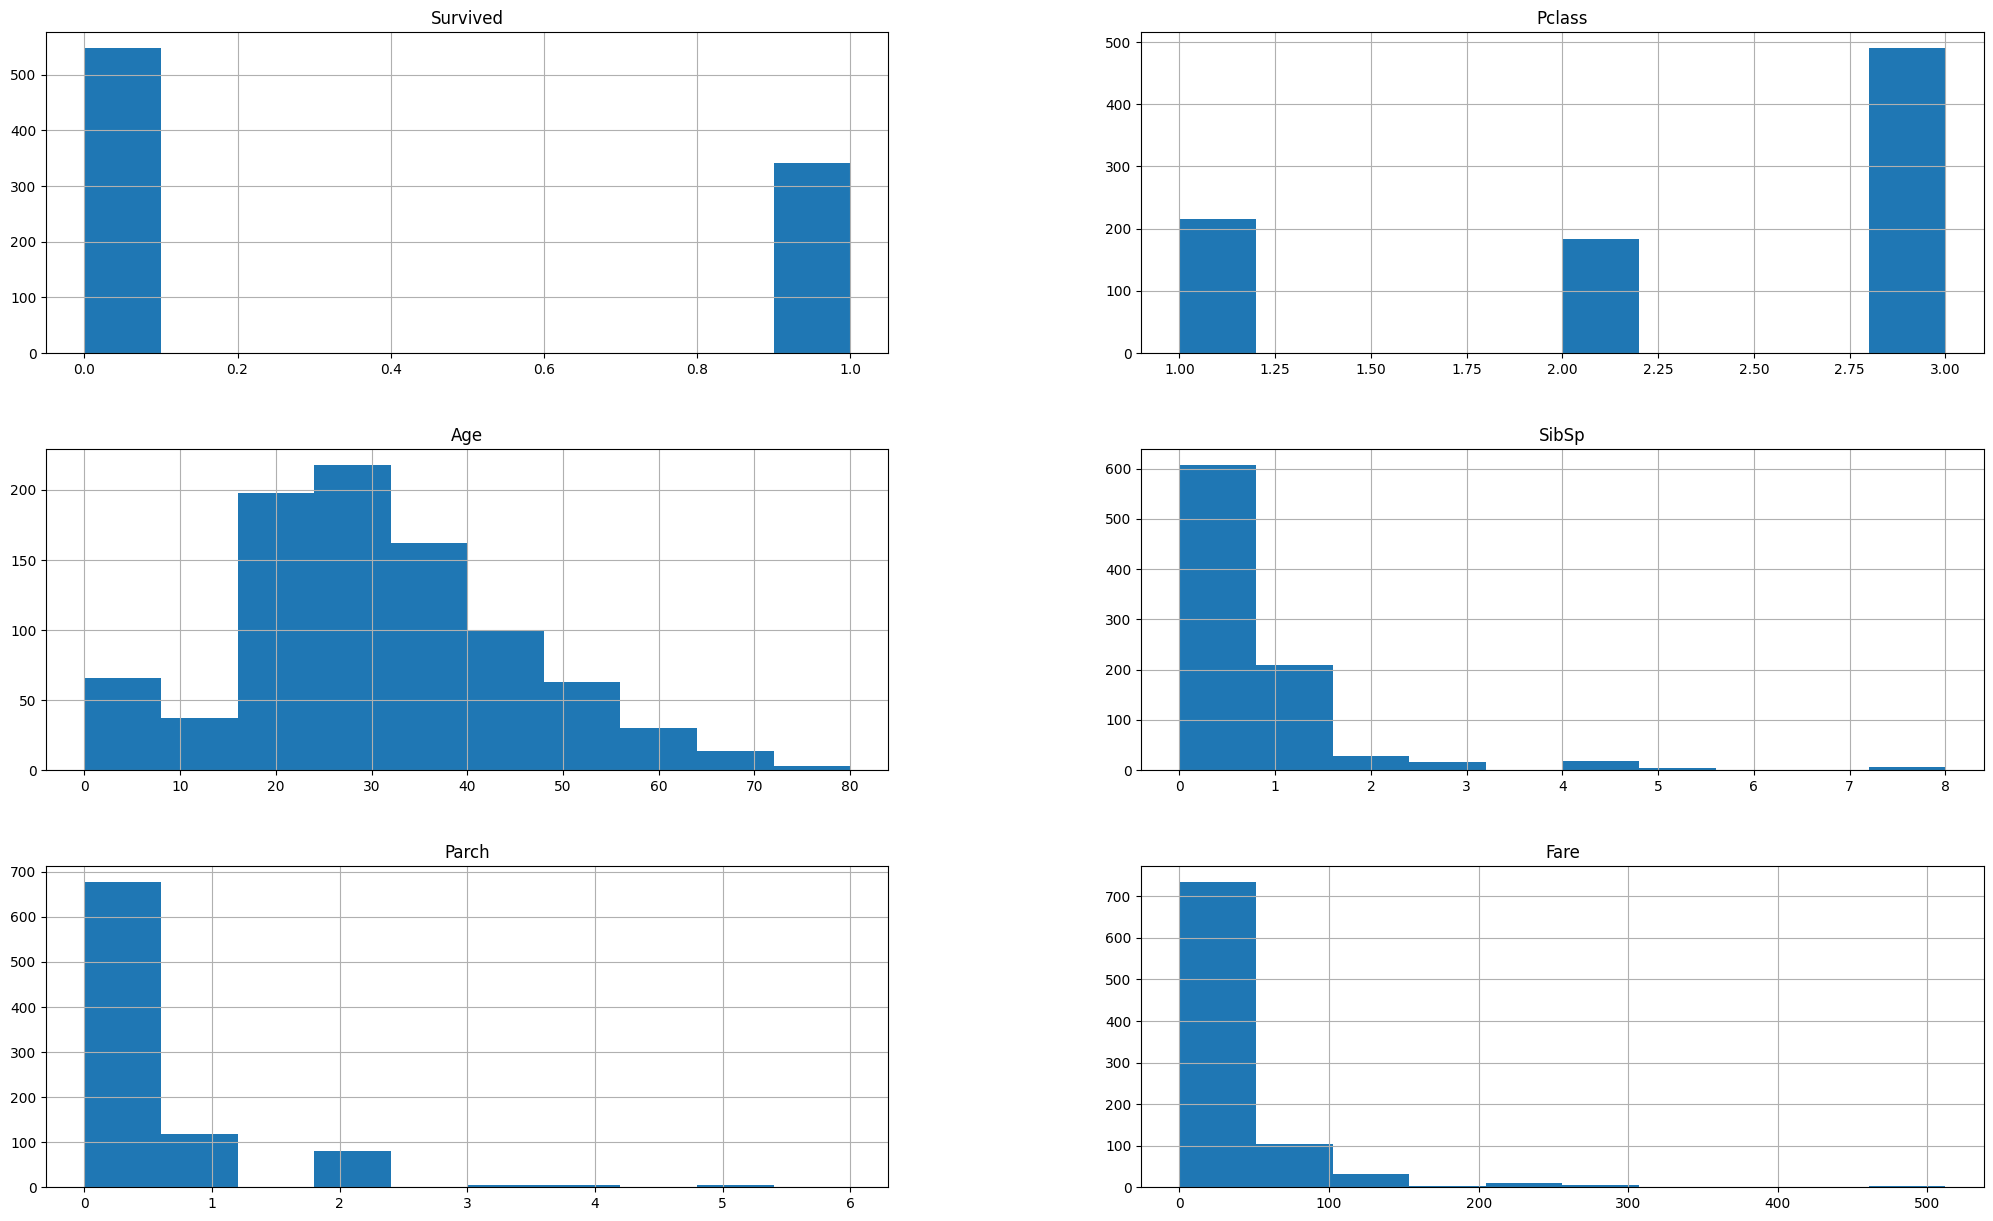

In [15]:
# plotando um histrograma das variaveis 

df_filtrado.hist()

plt.gcf().set_size_inches(25,15)

In [16]:
# analisando a proporção dos alvos categoricos
df_filtrado['Embarked'].value_counts(normalize = True)

S    0.723906
C    0.189675
Q    0.086420
Name: Embarked, dtype: float64

In [17]:
# analisando a proporção dos alvos categoricos
df_filtrado['Sex'].value_counts(normalize = True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [18]:
# analisando a proporção dos alvos categoricos
df_filtrado['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
# analisando a relação entre duas variaveis
# Pclass influenciou ?
pd.crosstab((df_filtrado['Pclass'] ), df_filtrado['Survived']/df_filtrado.shape[0]*100)

Survived,0.000000,0.112233
Pclass,,
1,80,136
2,97,87
3,372,119


In [20]:
# analisando a relação entre duas variaveis
# Quem foi sozinho teria mais chances de ficar vivo do que os com mais acompanhantes ?
pd.crosstab((df_filtrado['SibSp'] ), df_filtrado['Survived']/df_filtrado.shape[0]*100)

Survived,0.000000,0.112233
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [21]:
# transformando 'Sex' em numerico 

# male = 1
# famale = 0

df_filtrado['Sex'] = np.where(df_filtrado['Sex'] == 'male' , 1, 0)

In [22]:
# analisando a proporção dos alvos categoricos
df_filtrado['Sex'].value_counts(normalize = True)

1    0.647587
0    0.352413
Name: Sex, dtype: float64

## Criando novas variaveis 

In [23]:
# Fare std
df_filtrado['Fare_std'] =  df_filtrado['Fare'].std() / (df_filtrado['Fare'] -1)

# SibSp / Age
df_filtrado['S_Age'] = df_filtrado['SibSp'] / df_filtrado['Age']

# family  - 'Sibsp' + 'Parch'
df_filtrado['family'] = df_filtrado['SibSp'] + df_filtrado['Parch']

# mediam money  - 'family'/'Fare'
df_filtrado['m_money'] = df_filtrado['family'] / df_filtrado['Fare']

In [24]:
# Replacing infinite with nan
df_filtrado.replace([np.inf, -np.inf], np.nan, inplace=True)

## Repartindo variaveis contantes em intervalos 

In [25]:
# Separando 'Age' em intervalos 
age_int = list(range(df_filtrado.Age.min()+5, df_filtrado.Age.max()+5, 5)) # repartindo de 5 em 5

# criando o nome dos intervalos
nome_int = [f'age_i{i}' for i in range(len(age_int)-1)]

# atribuindo ao dataframe
df_filtrado['age_int'] = pd.cut(df_filtrado.Age, age_int, labels = nome_int, include_lowest = True)

##############################################################################
# Separando 'Fare' em intervalos 
fare_int = list(range(df_filtrado.Fare.min(), df_filtrado.Fare.max()+10000, 10)) # repartindo de 10 em 10

# criando o nome dos intervalos
nome_int2 = [f'age_i{i}' for i in range(len(fare_int)-1)]

# atribuindo ao dataframe
df_filtrado['fare_int'] = pd.cut(df_filtrado.Fare, fare_int, labels = nome_int2, include_lowest = True)


In [26]:
#convertendo dtype de category em numerico 
categorias = {'age_int': { 'age_i0': 0, 'age_i1': 1, 'age_i2': 2, 'age_i4': 4, 'age_i3': 3
                          ,'age_i5': 5, 'age_i6': 6, 'age_i7': 7, 'age_i8': 8, 'age_i9': 9, 'age_i10': 10, 'age_i11': 11
                          ,'age_i12': 12, 'age_i13': 13, 'age_i14': 14, 'age_i15': 15, 'age_i16': 16, 'age_i17': 17}}
df_filtrado.replace(categorias, inplace = True)

#################################################
# convertendo dtype de category para int
categorias2 = {'fare_int': {'fare_i0': 0, 'fare_i1': 1, 'fare_i2': 2, 'fare_i4': 4, 'fare_i3': 3, 'fare_i5': 5,'fare_i6': 6, 'fare_i7': 7, 'fare_i8': 8, 'fare_i9': 9, 'fare_i10': 10}}
df_filtrado.replace(categorias2, inplace = True)

In [27]:
#transformando em object
df_filtrado['age_int'] = np.array(df_filtrado['age_int'],dtype='object')
df_filtrado['fare_int'] = np.array(df_filtrado['fare_int'],dtype='object')

In [28]:
# Removendo as variavesi 'Age', 'Fare'
df_filtrado.drop(['Age','Fare'], axis = 1)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Fare_std,S_Age,family,m_money,age_int,fare_int
0,0,3,1,1,0,A/5 21171,C85,S,8.283955,0.045455,1,0.142857,3.0,age_i0
1,1,1,0,1,0,PC 17599,C85,C,0.710053,0.026316,1,0.014085,6.0,age_i7
2,1,3,0,0,0,STON/O2. 3101282,C123,S,8.283955,0.000000,0,0.000000,4.0,age_i0
3,1,1,0,1,0,113803,C123,S,0.955841,0.028571,1,0.018868,5.0,age_i5
4,0,3,1,0,0,373450,E46,S,7.100533,0.000000,0,0.000000,5.0,age_i0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,211536,B42,S,4.141977,0.000000,0,0.000000,4.0,age_i1
887,1,1,0,0,0,112053,B42,S,1.713922,0.000000,0,0.000000,2.0,age_i2
888,0,3,0,1,2,W./C. 6607,C148,S,2.259260,0.038462,3,0.130435,4.0,age_i2
889,1,1,1,0,0,111369,C148,C,1.713922,0.000000,0,0.000000,4.0,age_i2


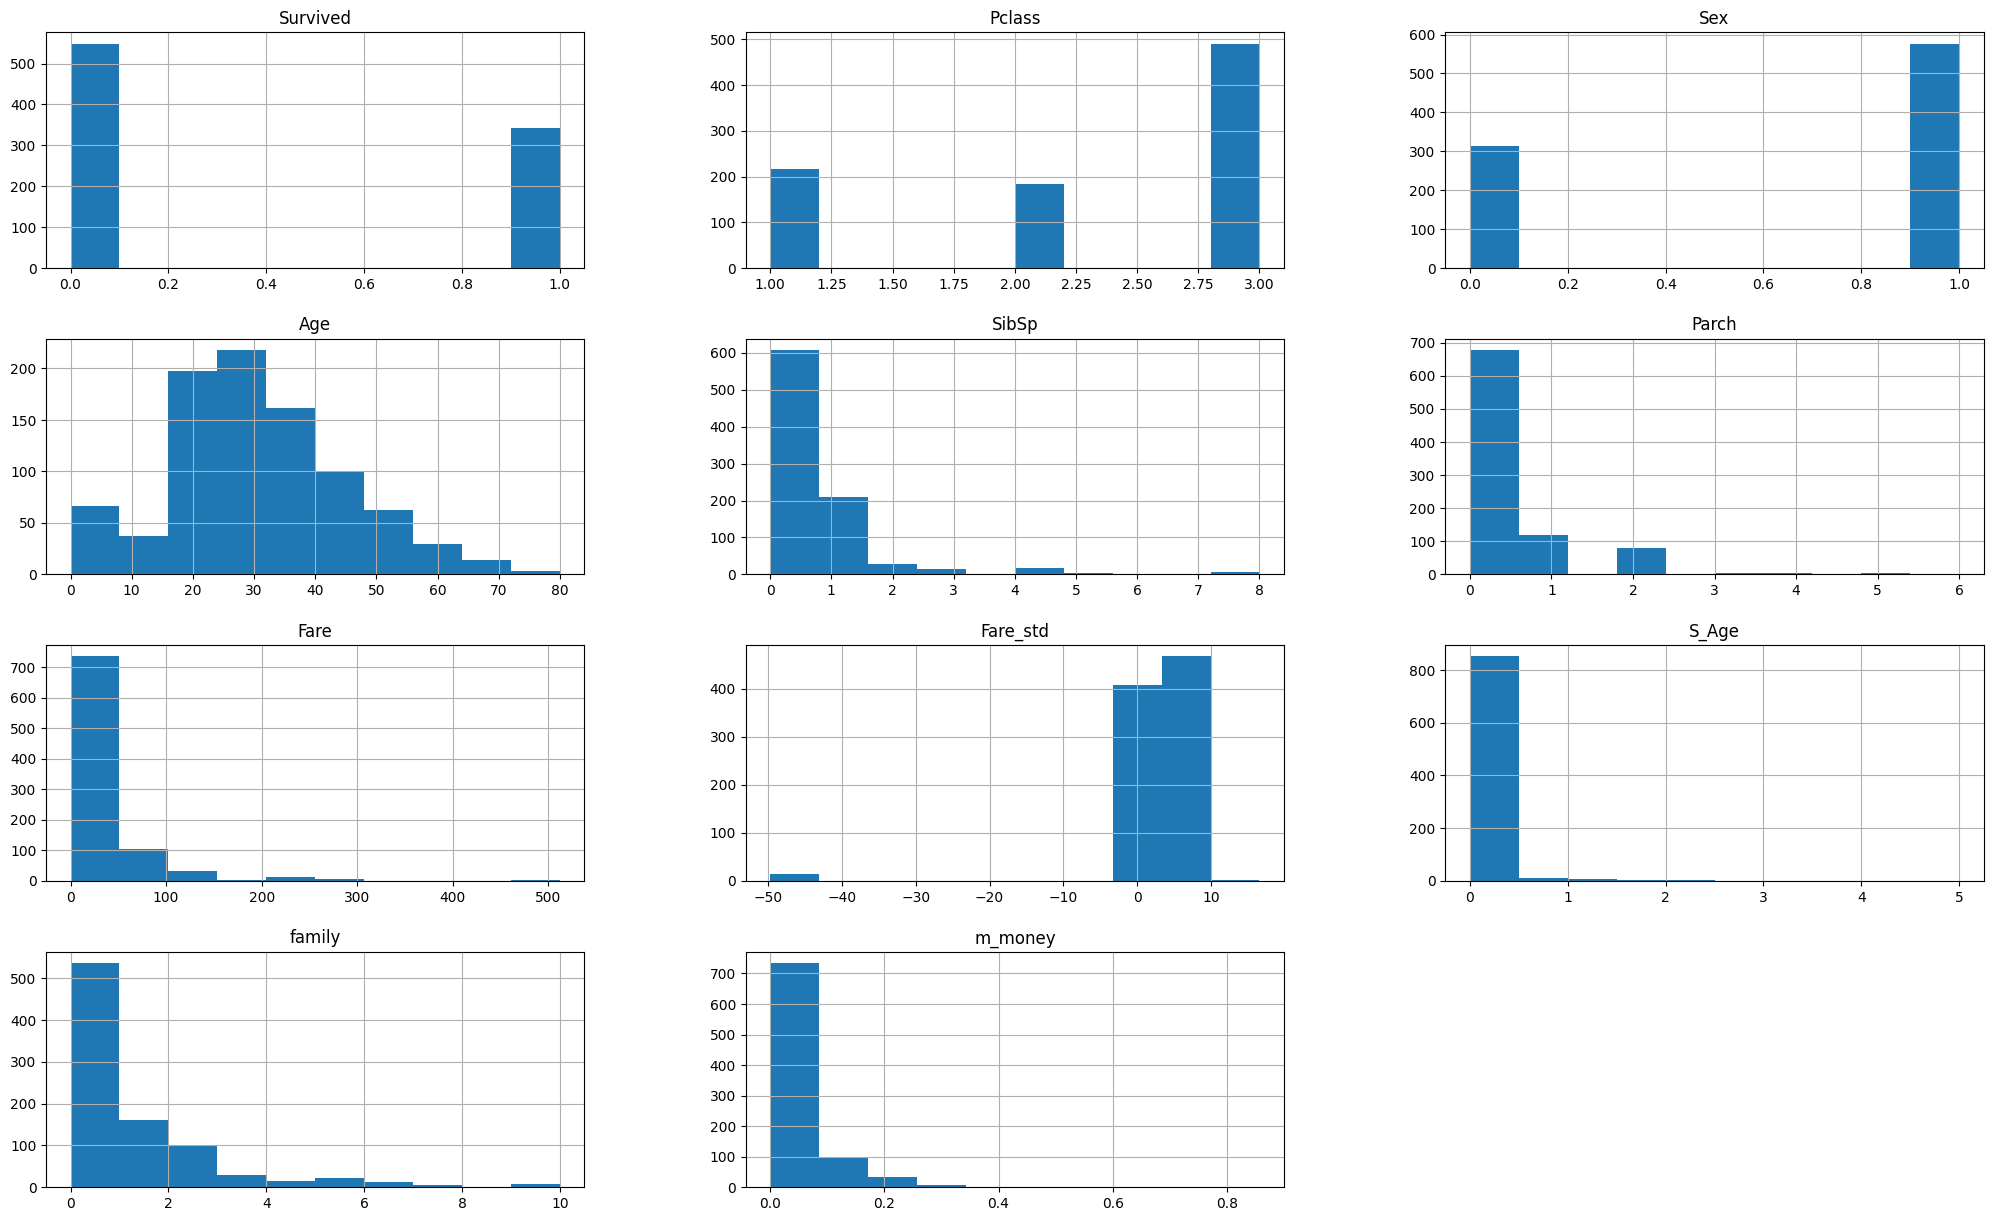

In [29]:
df_filtrado.hist()
plt.gcf().set_size_inches(25,15)

In [30]:
df_filtrado.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_std,S_Age,family,m_money,age_int,fare_int
0,0,3,1,22,1,0,A/5 21171,7,C85,S,8.283955,0.045455,1,0.142857,3.0,age_i0
1,1,1,0,38,1,0,PC 17599,71,C85,C,0.710053,0.026316,1,0.014085,6.0,age_i7
2,1,3,0,26,0,0,STON/O2. 3101282,7,C123,S,8.283955,0.000000,0,0.000000,4.0,age_i0
3,1,1,0,35,1,0,113803,53,C123,S,0.955841,0.028571,1,0.018868,5.0,age_i5
4,0,3,1,35,0,0,373450,8,E46,S,7.100533,0.000000,0,0.000000,5.0,age_i0


In [31]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    int64  
 8   Cabin     890 non-null    object 
 9   Embarked  891 non-null    object 
 10  Fare_std  891 non-null    float64
 11  S_Age     878 non-null    float64
 12  family    891 non-null    int64  
 13  m_money   876 non-null    float64
 14  age_int   837 non-null    object 
 15  fare_int  891 non-null    object 
dtypes: float64(3), int64(8), object(5)
memory usage: 111.5+ KB


## Convertendo valores categoricos em numeros

In [32]:
# Usando o LabelEncoder !!!!!!!!!!!!!!! muito importante 

encoder = LabelEncoder()

# percorrendo e transformando toda a base de dados

for variaveis in df_filtrado.columns:
    if df_filtrado[variaveis].dtype == 'object':
        df_filtrado[variaveis] = encoder.fit_transform(df_filtrado[variaveis])

In [33]:
df_filtrado.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_std,S_Age,family,m_money,age_int,fare_int
0,0,3,1,22,1,0,523,7,81,2,8.283955,0.045455,1,0.142857,3,0
1,1,1,0,38,1,0,596,71,81,0,0.710053,0.026316,1,0.014085,6,18
2,1,3,0,26,0,0,669,7,55,2,8.283955,0.000000,0,0.000000,4,0
3,1,1,0,35,1,0,49,53,55,2,0.955841,0.028571,1,0.018868,5,15
4,0,3,1,35,0,0,472,8,129,2,7.100533,0.000000,0,0.000000,5,0


In [34]:

# Verificando os valores faltantes
print(df_filtrado.isna().sum())

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     0
Fare_std     0
S_Age       13
family       0
m_money     15
age_int      0
fare_int     0
dtype: int64


In [35]:
# limpando possiveis missings values
df_filtrado.dropna(axis=0, inplace = True)

# Verificando os valores faltantes
print(df_filtrado.isna().values.any())

False


## Random Florest

In [37]:
# sempando o dataset para treinamento e teste

x_rf = df_filtrado.drop('Survived', axis = 1)
y_rf = df_filtrado['Survived']

# para insto precisamo da função train_test_split do sklearn
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(x_rf, y_rf, test_size = 0.5)

In [38]:
df_rf = RandomForestClassifier(bootstrap = True, criterion='gini'
                              , max_depth= 15, max_features= 'auto'
                              , min_samples_leaf=1, min_samples_split= 5
                              , n_estimators= 1500, n_jobs= 5, oob_score= True)
df_rf.fit(x_train_rf, y_train_rf)

RandomForestClassifier(max_depth=15, max_features='auto', min_samples_split=5,
                       n_estimators=1500, n_jobs=5, oob_score=True)

In [39]:
# fazendo a predição da base de treinamento e teste

y_pred_train_rf = df_rf.predict(x_train_rf)
y_pred_test_rf = df_rf.predict(x_test_rf)

In [40]:
# Calculando a ROC e o Gini - Treinamento
fpr_train_rf, tpr_train_rf, thresholds_train_rf = roc_curve(y_train_rf, y_pred_train_rf)
roc_auc_train_rf = auc(fpr_train_rf, tpr_train_rf)

print('AUC -  Treinamento : %f' % roc_auc_train_rf)
print('Gini -  Treinamento : ', round(2*roc_auc_train_rf-1,2))
print()

# Calculando a ROC e o Gini - Teste
fpr_test_rf, tpr_test_rf, thresholds_test_rf = roc_curve(y_test_rf, y_pred_test_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

print('AUC -  Test : %f' % roc_auc_test_rf)
print('Gini -  Test : ', round(2*roc_auc_test_rf-1,2))
print()

AUC -  Treinamento : 0.963460
Gini -  Treinamento :  0.93

AUC -  Test : 0.780397
Gini -  Test :  0.56



In [41]:
# Analisando a importancia das variaveis

imp_rf = pd.DataFrame({'Variaveis': x_train_rf.columns, 'Importancia': df_rf.feature_importances_})# feature_importances_ - mostra as variaveis importantes
imp_rf = imp_rf.sort_values(by=['Importancia'],ascending= False)

#soma acumulativa da 'Importancia'
imp_rf['cumsum'] = imp_rf['Importancia'].cumsum()

imp_rf

,Variaveis,Importancia,cumsum
1,Sex,0.220116,0.220116
5,Ticket,0.159501,0.379617
7,Cabin,0.086877,0.466494
2,Age,0.084836,0.551330
9,Fare_std,0.076886,0.628216
6,Fare,0.076435,0.704651
13,age_int,0.055342,0.759993
12,m_money,0.045783,0.805775
0,Pclass,0.043252,0.849028
14,fare_int,0.035517,0.884544


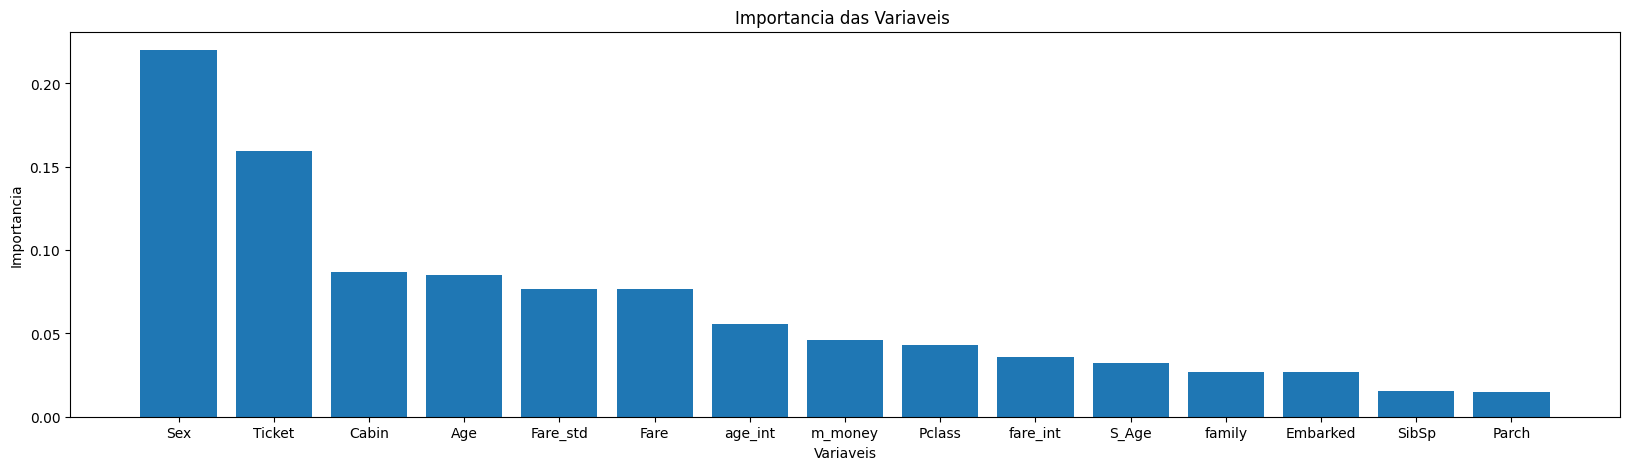

In [42]:
plt.figure(figsize=(20,5))
plt.xticks(range(len(imp_rf)), imp_rf['Variaveis'])
plt.xlabel('Variaveis')
plt.ylabel('Importancia')
plt.title('Importancia das Variaveis ')
plt.bar(range(len(imp_rf)), imp_rf['Importancia']);

In [43]:
imp_rf['Variaveis'].values

array(['Sex', 'Ticket', 'Cabin', 'Age', 'Fare_std', 'Fare', 'age_int',
       'm_money', 'Pclass', 'fare_int', 'S_Age', 'family', 'Embarked',
       'SibSp', 'Parch'], dtype=object)

In [44]:
# variaveis que serão usadas no modelo - entorno de 75% da importancia

df2 = df_filtrado[['Sex', 'Ticket', 'Cabin', 'Fare', 'Fare_std', 'Age', 'Pclass',
       'age_int',  'Survived']]

# Regressão Logistica

In [45]:
# separando os dados com as variavesi em x e o alvo y 

x = df2.drop('Survived', axis = 1)
y = df2['Survived']

# separando entre treinamento e teste 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5)

In [46]:
# Inicializa a intancia e treina o modelo 

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)


reg_log = sm.GLM(y_train, x_train_, family = sm.families.Binomial())

reg_log = reg_log.fit()

print(reg_log.summary())
print()
print('Parameters: ', reg_log.params)
print()
print('Odds ratio')
print(np.exp(reg_log.params)) # valores para aplicar na formula da Regressão Logística

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  431
Model:                            GLM   Df Residuals:                      422
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -191.88
Date:                Tue, 27 Jun 2023   Deviance:                       383.77
Time:                        17:24:03   Pearson chi2:                     456.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3630
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9574      0.786      6.305      0.0

## Avaliação do Modelo

In [47]:
# fazendo a predisão  na base de treinamento e na de teste

y_pred_train = reg_log.predict(x_train_)

y_pred_test = reg_log.predict(x_test_)

# Calculando a ROC e o Gini - Treinamento
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)

print('AUC -  Treinamento : %f' % roc_auc_train)
print('Gini -  Treinamento : ', round(2*roc_auc_train-1,2))
print()


# Calculando a ROC e o Gini - Teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)

print('AUC -  Test : %f' % roc_auc_test)
print('Gini -  Test : ', round(2*roc_auc_test-1,2))
print()

AUC -  Treinamento : 0.853212
Gini -  Treinamento :  0.71

AUC -  Test : 0.850183
Gini -  Test :  0.7

